

# Análise dos Dados do Airbnb - *Montreal, Quebec, Canada*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

[<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>](http://insideairbnb.com/get-the-data/)

**Neste *notebook*, iremos analisar os dados referentes à cidade Montreal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Montreal (good for visualisations).*

In [44]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [7]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('listings.csv')

## Análise dos Dados

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `license` - De acordo com a lei, aluguéis específicos de curto prazo exigem uma licença.

In [9]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45728646,Guest suite in Montréal · ★4.69 · 1 bedroom · ...,753212,Georges,NaN,Le Plateau-Mont-Royal,45.538850,-73.560370,Private room,21.0,31,13,2022-11-01,0.34,3,286,0,NaN
1,27438926,Rental unit in Montréal · 1 bedroom · 1 bed · ...,202884942,Abbie,NaN,Rosemont-La Petite-Patrie,45.531530,-73.604250,Entire home/apt,40.0,90,0,NaN,NaN,1,0,0,NaN
2,910248010739253417,Rental unit in Montréal · ★New · 1 bedroom · 1...,65607998,Nabil,NaN,Verdun,45.454424,-73.547104,Entire home/apt,55.0,31,0,NaN,NaN,1,27,0,NaN
3,854389634569393267,Rental unit in Montréal · 2 bedrooms · 2 beds ...,368730072,Nouhaila,NaN,Ville-Marie,45.502018,-73.556932,Entire home/apt,160.0,31,0,NaN,NaN,1,364,0,NaN
4,767425771328334796,Rental unit in Montréal · ★4.80 · Studio · 1 b...,162017221,Damian,NaN,Ville-Marie,45.517690,-73.560770,Entire home/apt,60.0,31,4,2023-08-16,0.39,2,0,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

In [12]:
# identificar o volume de dados do DataFrame
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

# verificar as os tipos de dados
display(df.dtypes)

Entradas: 8807
Variáveis: 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [14]:
# Verificar a quantidade de valores ausentes e ordenar de forma decrescente por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.553537
reviews_per_month                 0.213126
last_review                       0.213126
price                             0.013058
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
host_name                         0.000000
host_id                           0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

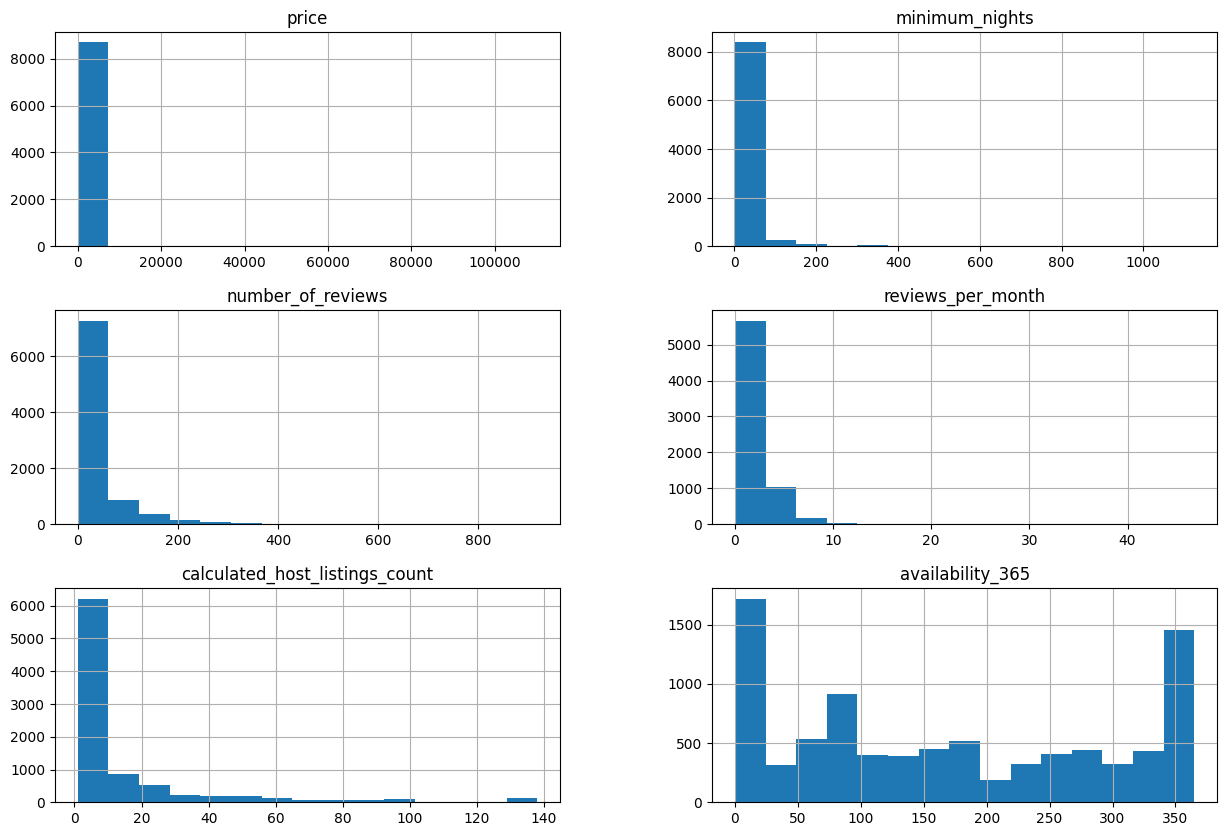

In [23]:
columns = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]
df.loc[:, columns].hist(bins=15, figsize=(15, 10));


In [24]:
df.loc[:, columns].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8692.000000,8807.000000,8807.000000,6930.000000,8807.000000,8807.000000
mean,155.597561,27.567617,33.984671,1.685257,13.937209,168.926763
std,1204.146151,50.315436,63.635844,2.006657,24.851757,129.068463
min,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,2.000000,1.000000,0.300000,1.000000,60.000000
50%,100.000000,31.000000,8.000000,0.950000,4.000000,153.000000
75%,156.000000,31.000000,40.000000,2.500000,14.000000,293.000000
max,110218.000000,1125.000000,918.000000,46.810000,138.000000,365.000000


### **Q4. Qual a média dos preços de aluguel?**

In [32]:
print("Preço médio: {:.2f}".format(df.price.mean()))

Preço médio: 155.60


### **Q5. Qual a correlação existente entre as variáveis**

In [33]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.219711,-0.005348,-0.020226,-0.012646,-0.005119
minimum_nights,0.219711,1.000000,-0.143008,-0.266531,-0.061929,0.082672
number_of_reviews,-0.005348,-0.143008,1.000000,0.479600,-0.069751,-0.116957
reviews_per_month,-0.020226,-0.266531,0.479600,1.000000,0.025712,-0.202198
calculated_host_listings_count,-0.012646,-0.061929,-0.069751,0.025712,1.000000,-0.043312
availability_365,-0.005119,0.082672,-0.116957,-0.202198,-0.043312,1.000000


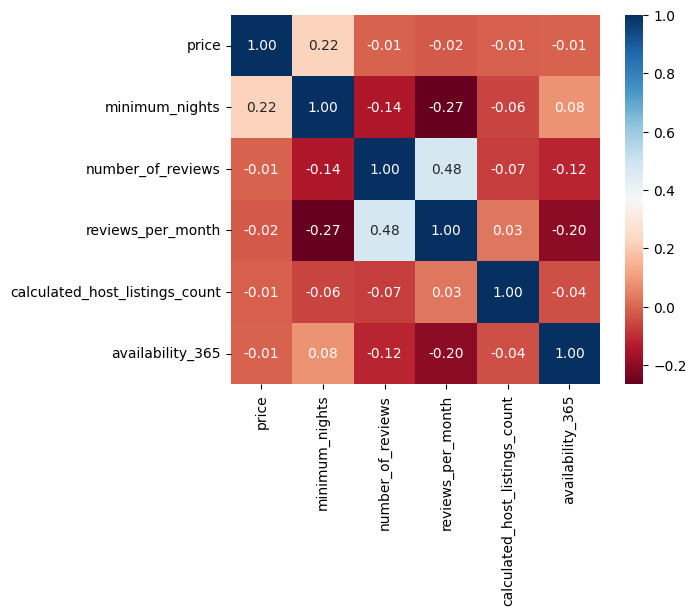

In [34]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [35]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    7225
Private room       1514
Shared room          53
Hotel room           15
Name: room_type, dtype: int64

In [37]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts() / df.shape[0]) * 100

Entire home/apt    82.037016
Private room       17.190871
Shared room         0.601794
Hotel room          0.170319
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



In [39]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
L'Île-Bizard-Sainte-Geneviève               267.625000
Baie-d'Urfé                                 233.666667
Dorval                                      231.800000
Le Plateau-Mont-Royal                       225.504792
Outremont                                   210.169811
Côte-Saint-Luc                              203.437500
Pierrefonds-Roxboro                         186.000000
Westmount                                   174.676471
Hampstead                                   157.200000
Ville-Marie                                 157.130515
Le Sud-Ouest                                150.562748
Kirkland                                    143.714286
Rosemont-La Petite-Patrie                   129.510535
L'Île-Dorval                                124.000000
Côte-des-Neiges-Notre-Dame-de-Grâce         121.705977
Rivière-des-Prairies-Pointe-aux-Trembles    120.447368
Pointe-Claire                               115.464286
Mont-Royal                                  115.266

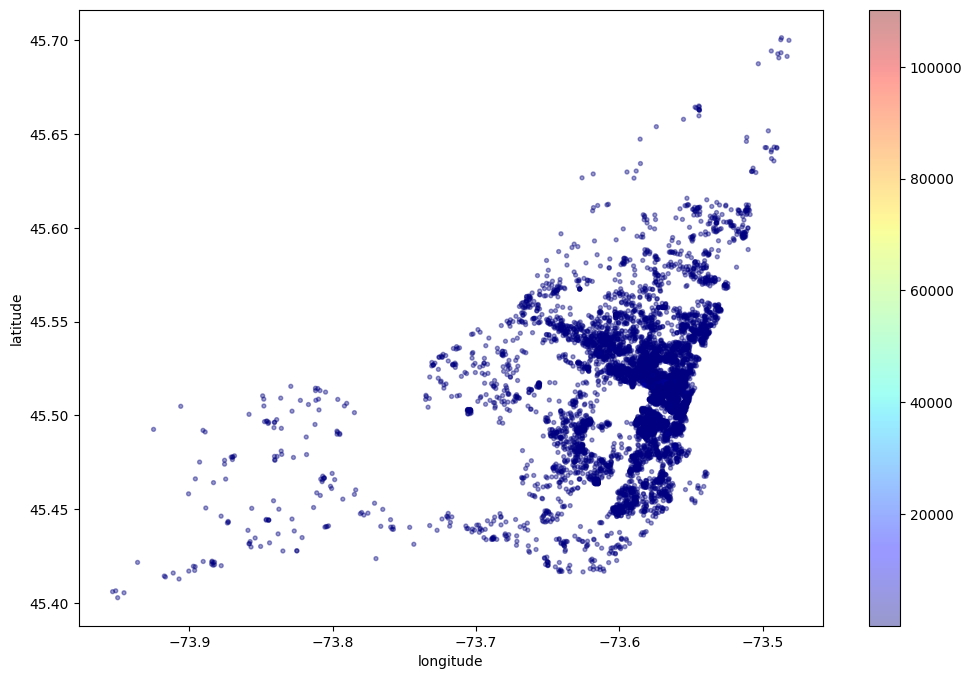

In [56]:
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));



### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [59]:
print("Média do mínimo de noiters: {:.2f}".format(df.minimum_nights.mean()))

Média do mínimo de noiters: 27.57


## Conclusões


A análise exploratória dos dados do Airbnb em Montreal revelou insights interessantes sobre o mercado de aluguel de propriedades na cidade.

Identificamos os tipos mais populares de imóveis, as localidades mais caras e a falta de correlações fortes entre as variáveis numéricas. Essas informações são valiosas tanto para viajantes em busca de acomodações quanto para anfitriões que desejam entender melhor o mercado e estabelecer preços competitivos.

A análise de dados do Airbnb não apenas oferece insights para viajantes e anfitriões individuais, mas também contribui para a compreensão mais ampla das tendências do mercado de hospedagem alternativa. Com o aumento da demanda por experiências personalizadas, a análise de dados desempenha um papel fundamental na tomada de decisões informadas e na criação de estratégias eficazes para todos os envolvidos nesse ecossistema dinâmico.